## Importing libraries

In [122]:
# import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Data loading

In [123]:
# define the path and assign data frame to the "df" variable

path = r'C:\Users\Jakov\Achievement 6'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.csv'), index_col = 0)

In [124]:
df.head()

,boat_type,manufacturer,type,year_built,length,width,material,location,views_last_7_days,old_currency,price_euro,country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3493.24,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490.00,Germany
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3946.51,Switzerland
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3475.67,Denmark
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399.00,Germany


## 03. Create a correlation matrix heatmap (colored).

In [125]:
# filter out all numerical variables with null values

filtered = df[(df['year_built'] > 0) & (df['length'].notnull()) & (df['width'].notnull())]

In [126]:
filtered.isnull().sum()

boat_type               0
manufacturer         1272
type                    5
year_built              0
length                  0
width                   0
material             1631
location               36
views_last_7_days       0
old_currency            0
price_euro              0
country                33
dtype: int64

In [127]:
corr_tab = filtered[['year_built', 'length', 'width', 'views_last_7_days', 'price_euro']].corr()

In [128]:
corr_tab

,year_built,length,width,views_last_7_days,price_euro
year_built,1.000000,-0.203331,-0.104668,-0.113185,0.104636
length,-0.203331,1.000000,0.870076,-0.139735,0.563496
width,-0.104668,0.870076,1.000000,-0.164861,0.520967
views_last_7_days,-0.113185,-0.139735,-0.164861,1.000000,-0.008777
price_euro,0.104636,0.563496,0.520967,-0.008777,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

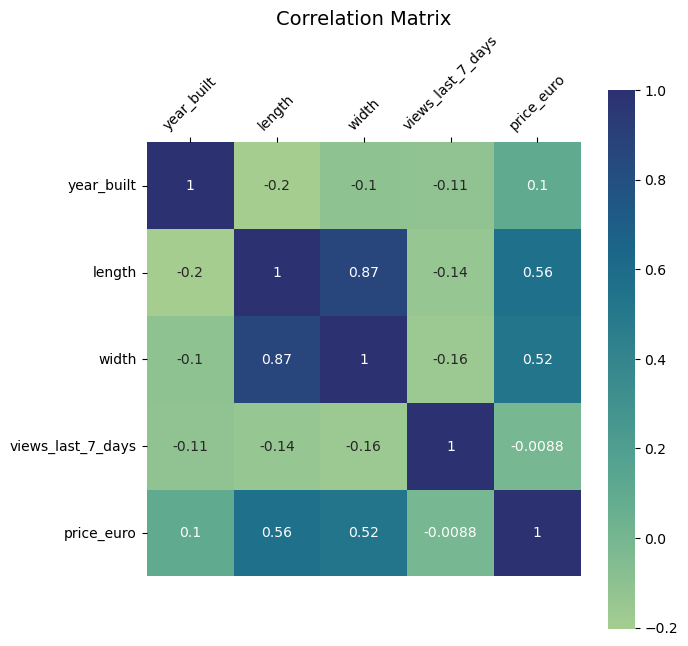

In [129]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(corr_tab, annot = True, ax = ax, square=True, cmap="crest") 

# Set y-axis labels horizontally
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Set x-axis labels on top and rotate by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.tick_top()

plt.title('Correlation Matrix', fontsize=14) # add title

### Strongest positive correlation here have "width" and "length" variables, which is quite self-explanatory and does need any discussion. The following strongest positive correlation is between "price_euro" and "length"/"width" variables. The only weak positive correlation is between "price_euro" and "year_built" variables. There is no correlation between "price_euro" and the "views_last_7_days" variables. There is negative weak correlation between "year_built" and "length", "width", "views_last_7_days" variables.


## 04. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

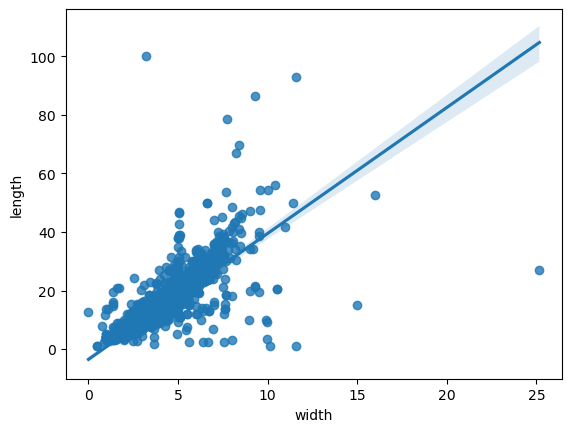

In [130]:
# Create a scatterplot for the "width" and "length" columns in seaborn

sp = sns.regplot(x = 'width', y = 'length', data = filtered)

### Here we can see that as the width or the length increases, datapoints tend to be further away from the line. The width greater than 12.5 has not the length above ~50. The length above ~50 has not the width more than 12. We don't have enough of those "greater" datapoints, thus it would not be fair to conclude anything, but there are some indications that  correlation might be weaker in case of length above ~50 and width above ~12.5.

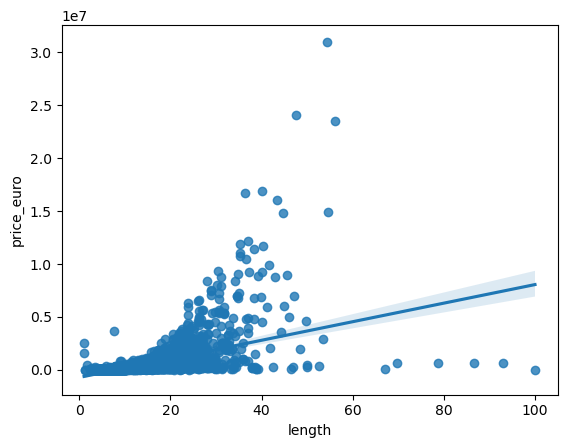

In [131]:
# Create a scatterplot for the "price_euro" and "length" columns in seaborn

sp2 = sns.regplot(x = 'length', y = 'price_euro', data = filtered)

### As one can observe from the visualization on the left, the relationship between the price and the length of a boat appears to be quite unclear.

### For the boats with the length of less than 15m, the relationship is non-existant.

### Between the length range of 15m and 25m, the price shows a gradual increase, but the rate of change is notably slow. The strongest relationship between price and boat length seems to lie within the range of 25m to 40m.
### Beyond a length of 40m, the number of data points decreases, and they become more dispersed.

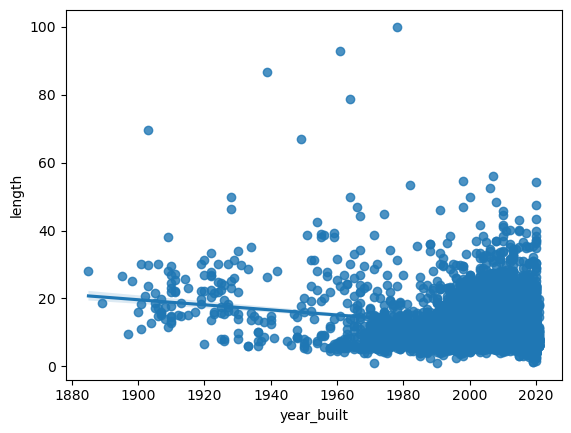

In [81]:
# Create a scatterplot for the "year_built" and "length" columns in seaborn

sp3 = sns.regplot(x = 'year_built', y = 'length', data = filtered)

### Here is an example of a weak negative correlation (-0.2). In the last 30 years there were no boats with the length above ~47. It seems that in the last 30 years, length of the boats have stayed consistent.


## 05. Create a pair plot of the entire data set.

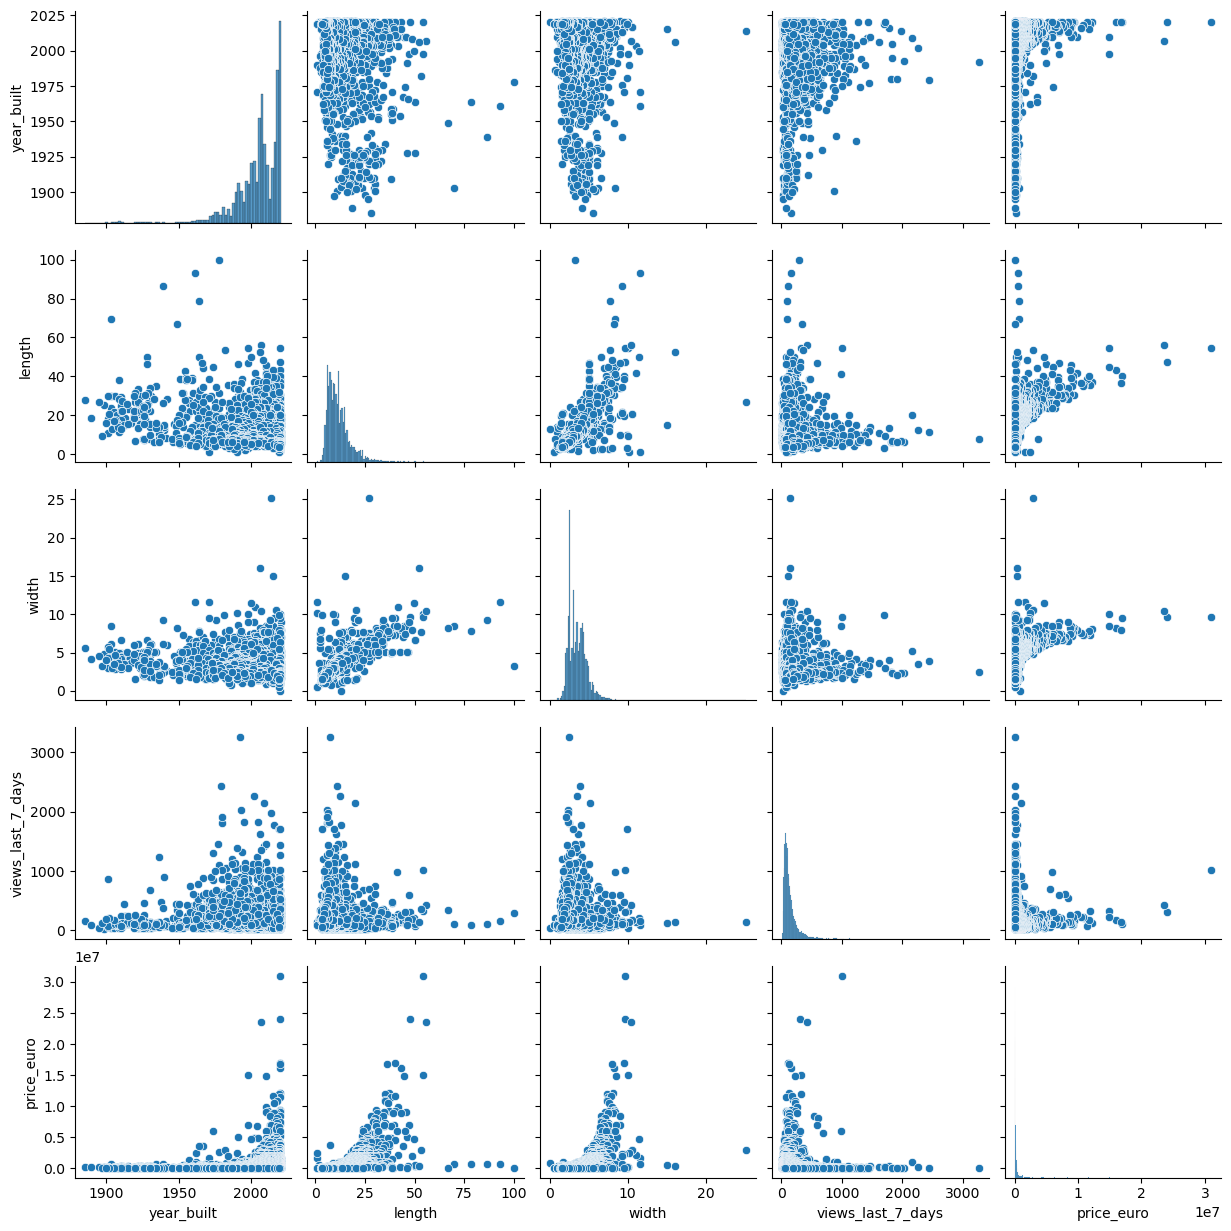

In [82]:
# Create a pair plot 

pair_plot = sns.pairplot(filtered)

### The "year_built" variable has a left-skewed distribution, while all other variables have a right-skewed distribution. I would like to further explore the "price_euro", "year_built", "width" and "length" variables. I would like to explore these variables to see how market of the boats might look like in a future. Will boats in the future be shorter but wider? How priced boats will be?

## 06. Create a categorical plot and interpret the results.

In [85]:
filtered['views_last_7_days'].value_counts().index.sort_values()

Int64Index([  13,   15,   18,   19,   20,   21,   22,   23,   24,   25,
            ...
            1804, 1831, 1834, 1917, 1970, 2026, 2154, 2261, 2432, 3263],
           dtype='int64', length=669)

In [91]:
# Segment the boats by relevancy, i.e. "views_last_7_days" variable

df.loc[df['views_last_7_days'] >= 2183 , 'relevancy'] = 'Hot boat'
df.loc[df['views_last_7_days'].between(1103, 2183, inclusive="left") , 'relevancy'] = 'Lukewarm boat'
df.loc[df['views_last_7_days'].between(0, 1103, inclusive="left") , 'relevancy'] = 'Cold boat'

In [92]:
df['relevancy'].value_counts(dropna=False)

Cold boat        9855
Lukewarm boat      30
Hot boat            3
Name: relevancy, dtype: int64

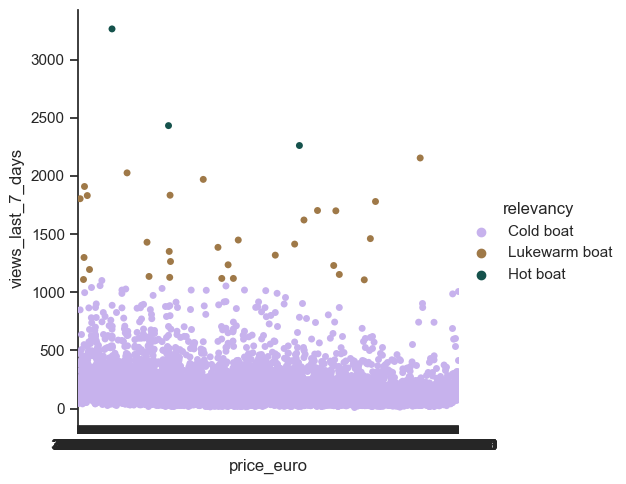

In [110]:
# Create a categorical plot in seaborn using the views categories created above

#sns.set(style="ticks")
ctg_plot = sns.catplot(x="price_euro", y="views_last_7_days", hue="relevancy", data=df, palette='cubehelix_r')

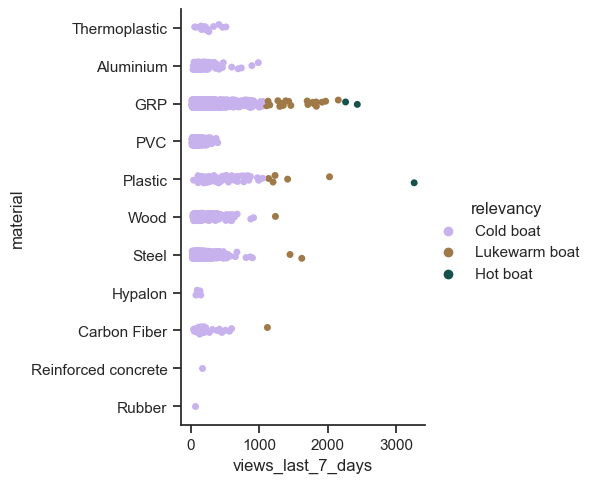

In [116]:
# Create a categorical plot in seaborn using the price categories created above

#sns.set(style="ticks")
ctg_plot = sns.catplot(x="views_last_7_days", y="material", hue="relevancy", data=df[df['material'].notnull()], palette='cubehelix_r')

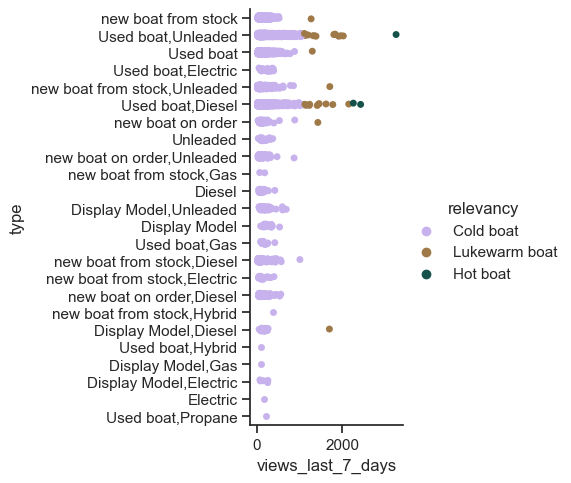

In [118]:
# Create a categorical plot in seaborn using the price categories created above

#sns.set(style="ticks")
ctg_plot = sns.catplot(x="views_last_7_days", y="type", hue="relevancy", data=df[df['type'].notnull()], palette='cubehelix_r')

### Here we can see that the most viewed boats are not the most expensive ones. It could be that the used boats, which were made of materials such as GRP and Plastic, tend to get more views.

## 07. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### What are characteristics of the most viewed boat listings in the last 7 days?

#### The used boats, which were made of materials such as GRP and Plastic, are the boats with the lot of views in the last 7 days.

### Is it the most expensive boats that get the most views?


#### No, there are more boats with the most views on the low-end of the spectrum than they are on the high-end spectrum when it comes to the views in the last 7 days.

## 08. Define any hypotheses that you can at this point. You’ll be testing these later on.

### In the future, boats will be shorter.

### In the future, boats will be wider

## The "price_euro" variable and categorical variables

In [8]:
pd.set_option('display.max_rows', None)

In [84]:
# Convert strings with multiple values into an array

df['boat_type'] = df['boat_type'].str.split(',')
df['type'] = df['type'].str.split(',')

In [85]:
# turn rows with mulitple values in "boat_type" or "type" columns into multiple rows

df_exploded = df.explode('boat_type').explode('type', ignore_index=True)

In [86]:
df.head(30)

,boat_type,manufacturer,type,year_built,length,width,material,location,views_last_7_days,old_currency,price_euro,country
0,[Motor Yacht],Rigiflex power boats,[new boat from stock],2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3493.24,Switzerland
1,[Center console boat],Terhi power boats,[new boat from stock],2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490.00,Germany
2,[Sport Boat],Marine power boats,[new boat from stock],0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3946.51,Switzerland
3,[Sport Boat],Pioner power boats,[new boat from stock],2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3475.67,Denmark
4,[Fishing Boat],Linder power boats,[new boat from stock],2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399.00,Germany
5,[Sport Boat],Linder power boats,[new boat from stock],0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,CHF,3820.89,Switzerland
6,[Catamaran],NaN,"[Used boat, Unleaded]",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,CHF,3768.55,Switzerland
7,[Sport Boat],NaN,[Used boat],0,3.00,NaN,NaN,Denmark Â» Svendborg,134,DKK,3328.06,Denmark
8,[Fishing Boat],Crescent power boats,[new boat from stock],2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45,EUR,3333.00,Germany
9,[Pontoon Boat],Whaly power boats,[new boat from stock],2018,4.35,1.73,NaN,Italy Â» Dormelletto,180,EUR,3300.00,Italy


In [87]:
df_exploded.head(20)

,boat_type,manufacturer,type,year_built,length,width,material,location,views_last_7_days,old_currency,price_euro,country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3493.24,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490.00,Germany
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3946.51,Switzerland
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,3475.67,Denmark
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399.00,Germany
5,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,CHF,3820.89,Switzerland
6,Catamaran,NaN,Used boat,1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,CHF,3768.55,Switzerland
7,Catamaran,NaN,Unleaded,1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,CHF,3768.55,Switzerland
8,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134,DKK,3328.06,Denmark
9,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45,EUR,3333.00,Germany


In [88]:
df_exploded.isnull().sum()

boat_type               0
manufacturer         2226
type                    7
year_built              0
length                 16
width                  98
material             2895
location               72
views_last_7_days       0
old_currency            0
price_euro              0
country                66
dtype: int64

In [89]:
# save exploded df in a new csv file

df_exploded.to_csv(os.path.join(path, '02 Data','Prepared Data', 'boat_data_exploded.csv'))

## Analysis of Variance

In [90]:
# import statsmodels library

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [92]:
model = ols('price_euro ~ boat_type', data=df_exploded).fit() # Fit the Ordinary Least Squares Model onto the dataset

anova_table = sm.stats.anova_lm(model, typ=2) # calculate the anova table

anova_table

,sum_sq,df,F,PR(>F)
boat_type,6.214073e+15,25.0,428.71188,0.0
Residual,1.053189e+16,18165.0,NaN,NaN


### Having "PR(>F)" smaller than a significance level of 0.05, one can reject the null hypothesis and say that there are significant differences between the means across different "boat_type" groups.

In [93]:
model2 = ols('price_euro ~ type', data=df_exploded).fit() # Fit the Ordinary Least Squares Model onto the dataset

anova_table = sm.stats.anova_lm(model2, typ=2) # calculate the anova table

anova_table

,sum_sq,df,F,PR(>F)
type,3.205267e+14,9.0,39.41783,3.105206e-70
Residual,1.642024e+16,18174.0,NaN,NaN


### Having "PR(>F)" smaller than a significance level of 0.05, one can reject the null hypothesis and say that there are significant differences between the means of "price_euro" across different "type" groups.

In [94]:
model3 = ols('price_euro ~ manufacturer', data=df_exploded).fit() # Fit the Ordinary Least Squares Model onto the dataset

anova_table = sm.stats.anova_lm(model3, typ=2) # calculate the anova table

anova_table

,sum_sq,df,F,PR(>F)
manufacturer,6.820925e+15,909.0,14.632348,0.0
Residual,7.720513e+15,15055.0,NaN,NaN


### Having "PR(>F)" smaller than a significance level of 0.05, one can reject the null hypothesis and say that there are significant differences between the means of "price_euro" across different "manufacturer" groups.

In [95]:
model4 = ols('price_euro ~ material', data=df_exploded).fit() # Fit the Ordinary Least Squares Model onto the dataset

anova_table = sm.stats.anova_lm(model4, typ=2) # calculate the anova table

anova_table

,sum_sq,df,F,PR(>F)
material,4.883195e+13,10.0,9.398186,9.774290e-16
Residual,7.941920e+15,15285.0,NaN,NaN


### Having "PR(>F)" smaller than a significance level of 0.05, one can reject the null hypothesis and say that there are significant differences between the means of "price_euro" across different "material" groups.

In [96]:
model5 = ols('price_euro ~ country', data=df_exploded).fit() # Fit the Ordinary Least Squares Model onto the dataset

anova_table = sm.stats.anova_lm(model5, typ=2) # calculate the anova table

anova_table

,sum_sq,df,F,PR(>F)
country,9.788217e+14,47.0,23.962139,2.285257e-198
Residual,1.571110e+16,18077.0,NaN,NaN


### Having "PR(>F)" smaller than a significance level of 0.05, one can reject the null hypothesis and say that there are significant differences between the means of "price_euro" across different "country" groups.

C:\Users\Jakov\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


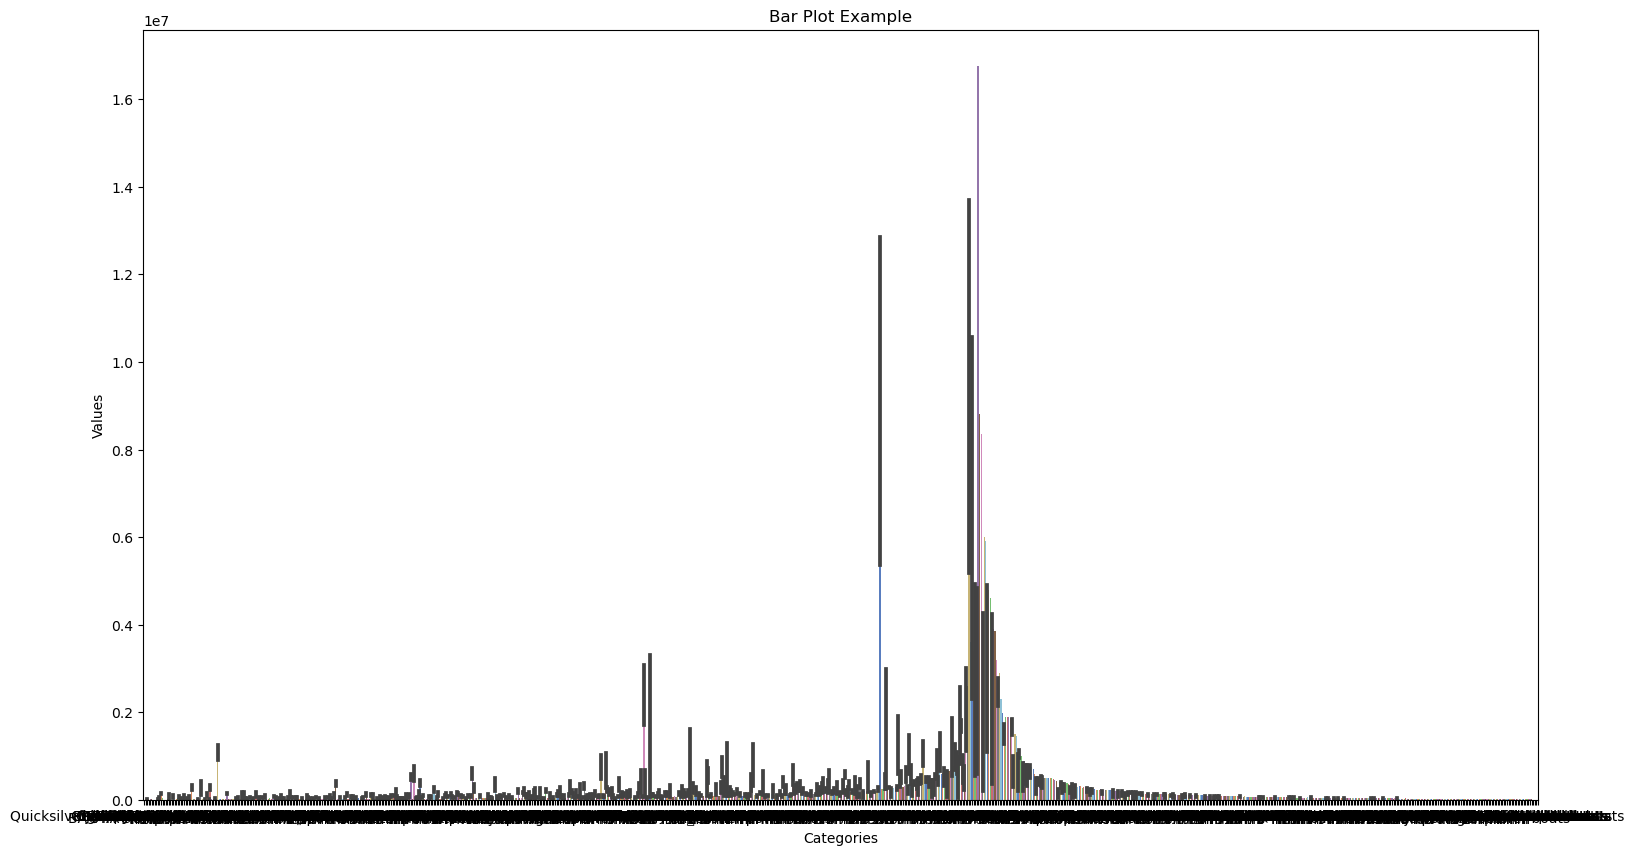

In [121]:
plt.figure(figsize=(18, 10))
# Create a bar plot using Seaborn
sns.barplot(x=df['manufacturer'], y=df['price_euro'], palette="muted")


# Add labels and title (optional)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot Example')

# Show the plot
plt.show()